In [1]:
import numpy as np
import matplotlib.pyplot as plt

<div>
   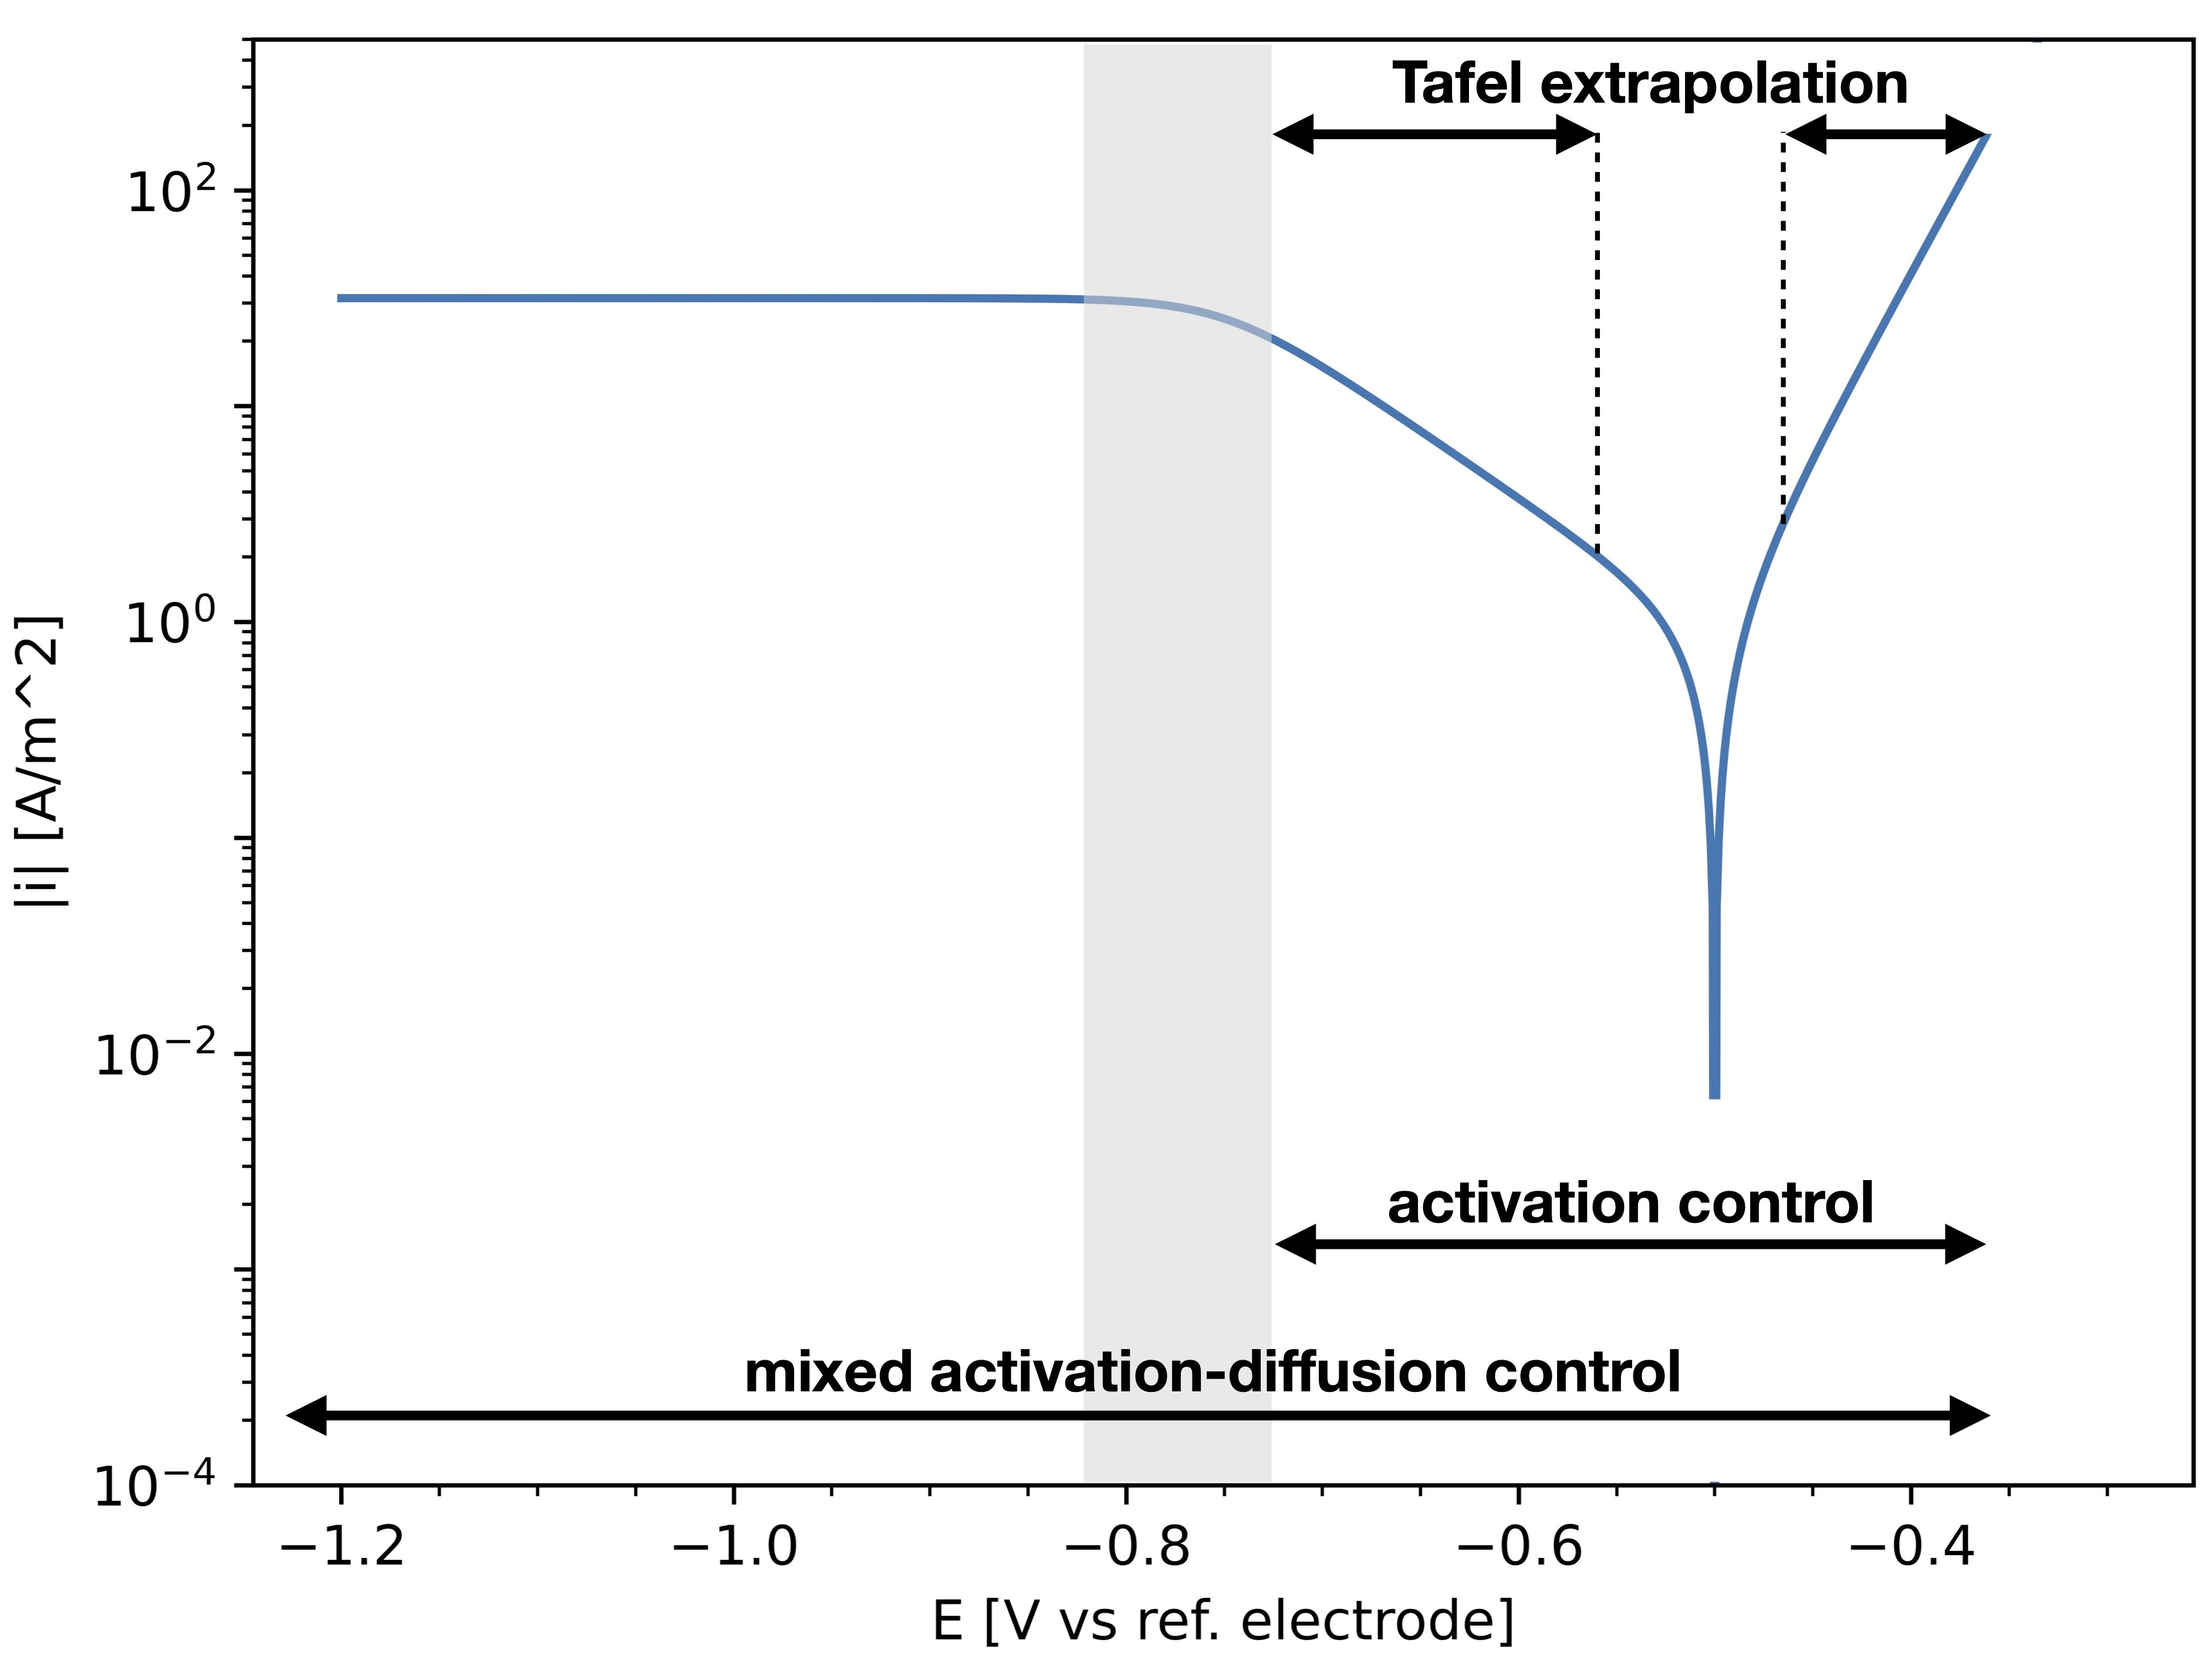
</div>

## Read polarization curve data from an example file:

In [2]:
from polcurvefit import DataImport as di

inputfile = './polcurvefit/data/example_txt.txt'
E,I = di.load_txt(inputfile, lines_header = 1)


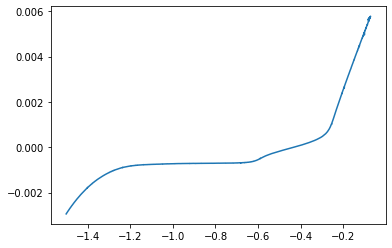

In [3]:
plt.plot(E,I)


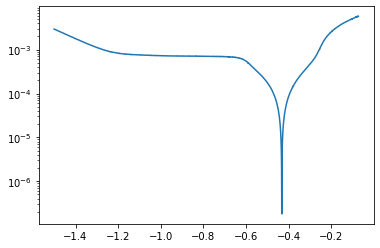

In [4]:
plt.plot(E,np.abs(I))
plt.yscale('log')

## Initialize a polarization curve object

In [5]:
from polcurvefit import PolCurveFit
Mycurve = PolCurveFit(E,I,R = 0,sample_surface=1)

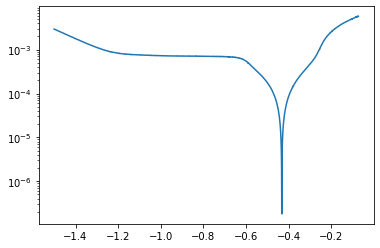

In [6]:
plt.plot(Mycurve.E, np.abs(Mycurve.i))
plt.yscale('log')

## Tafel extrapolation

In [11]:
results = Mycurve.linear_fit(window=[-0.6,-0.5], E_corr = -0.42, obtain_io = True, E_rev = 0.82) #, obtain_io = True, E_rev = 0.82)

In [12]:
Mycurve.save_to_txt()

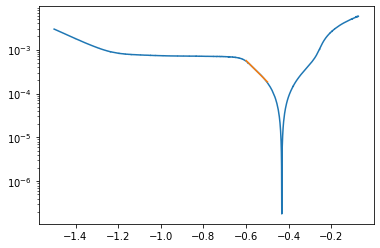

In [13]:
plt.plot(Mycurve.E, np.abs(Mycurve.i))
plt.plot(results[0][1],np.abs(results[0][0]))
plt.yscale('log')

In [11]:
Mycurve.plotting(output_folder = 'examples/output_linear')

Output folder exists - plots will be overwritten


## Activation control fit

In [14]:
results = Mycurve.active_pol_fit(window=[-0.05,0]) # i_corr_guess=


In [15]:
Mycurve.save_to_txt()
print(results[1:])

(-0.432739258, 8.285910617671534e-05, 0.12135073074081425, -0.1698190727637814, 3.827821463473642e-06)


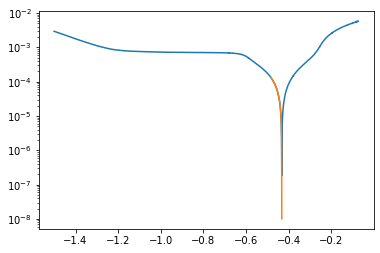

In [16]:
plt.plot(Mycurve.E, np.abs(Mycurve.i))
plt.plot(results[0][1],np.abs(results[0][0]))
plt.yscale('log')

In [29]:
Mycurve.plotting(output_folder = 'examples/output_act')

Output folder exists - plots will be overwritten


## Mixed activation-diffusion control fit

In [7]:
results = Mycurve.mixed_pol_fit(window=[-0.4,0.1]) # i_L_guess = , fix_i_L = False

-0.00013126012762571603
-0.00013126012762571603


ValueError: math domain error

In [18]:
print(results[1:])

(-0.432742858, 0.5144165594501189, 0.17679289096230985, -0.2006380327036474, 3.511355768605924, 0.9855705665670939, 3.9999999999999707)


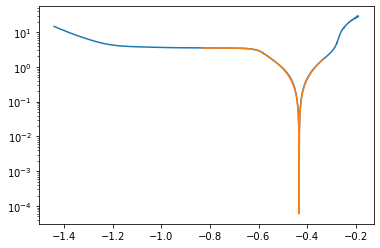

In [19]:
plt.plot(Mycurve.E, np.abs(Mycurve.i))
plt.plot(results[0][1],np.abs(results[0][0]))
plt.yscale('log')

In [ ]:
Mycurve.plotting(output_folder = 'examples/output_mixed')

### applying a specific weight distribution

<div>
   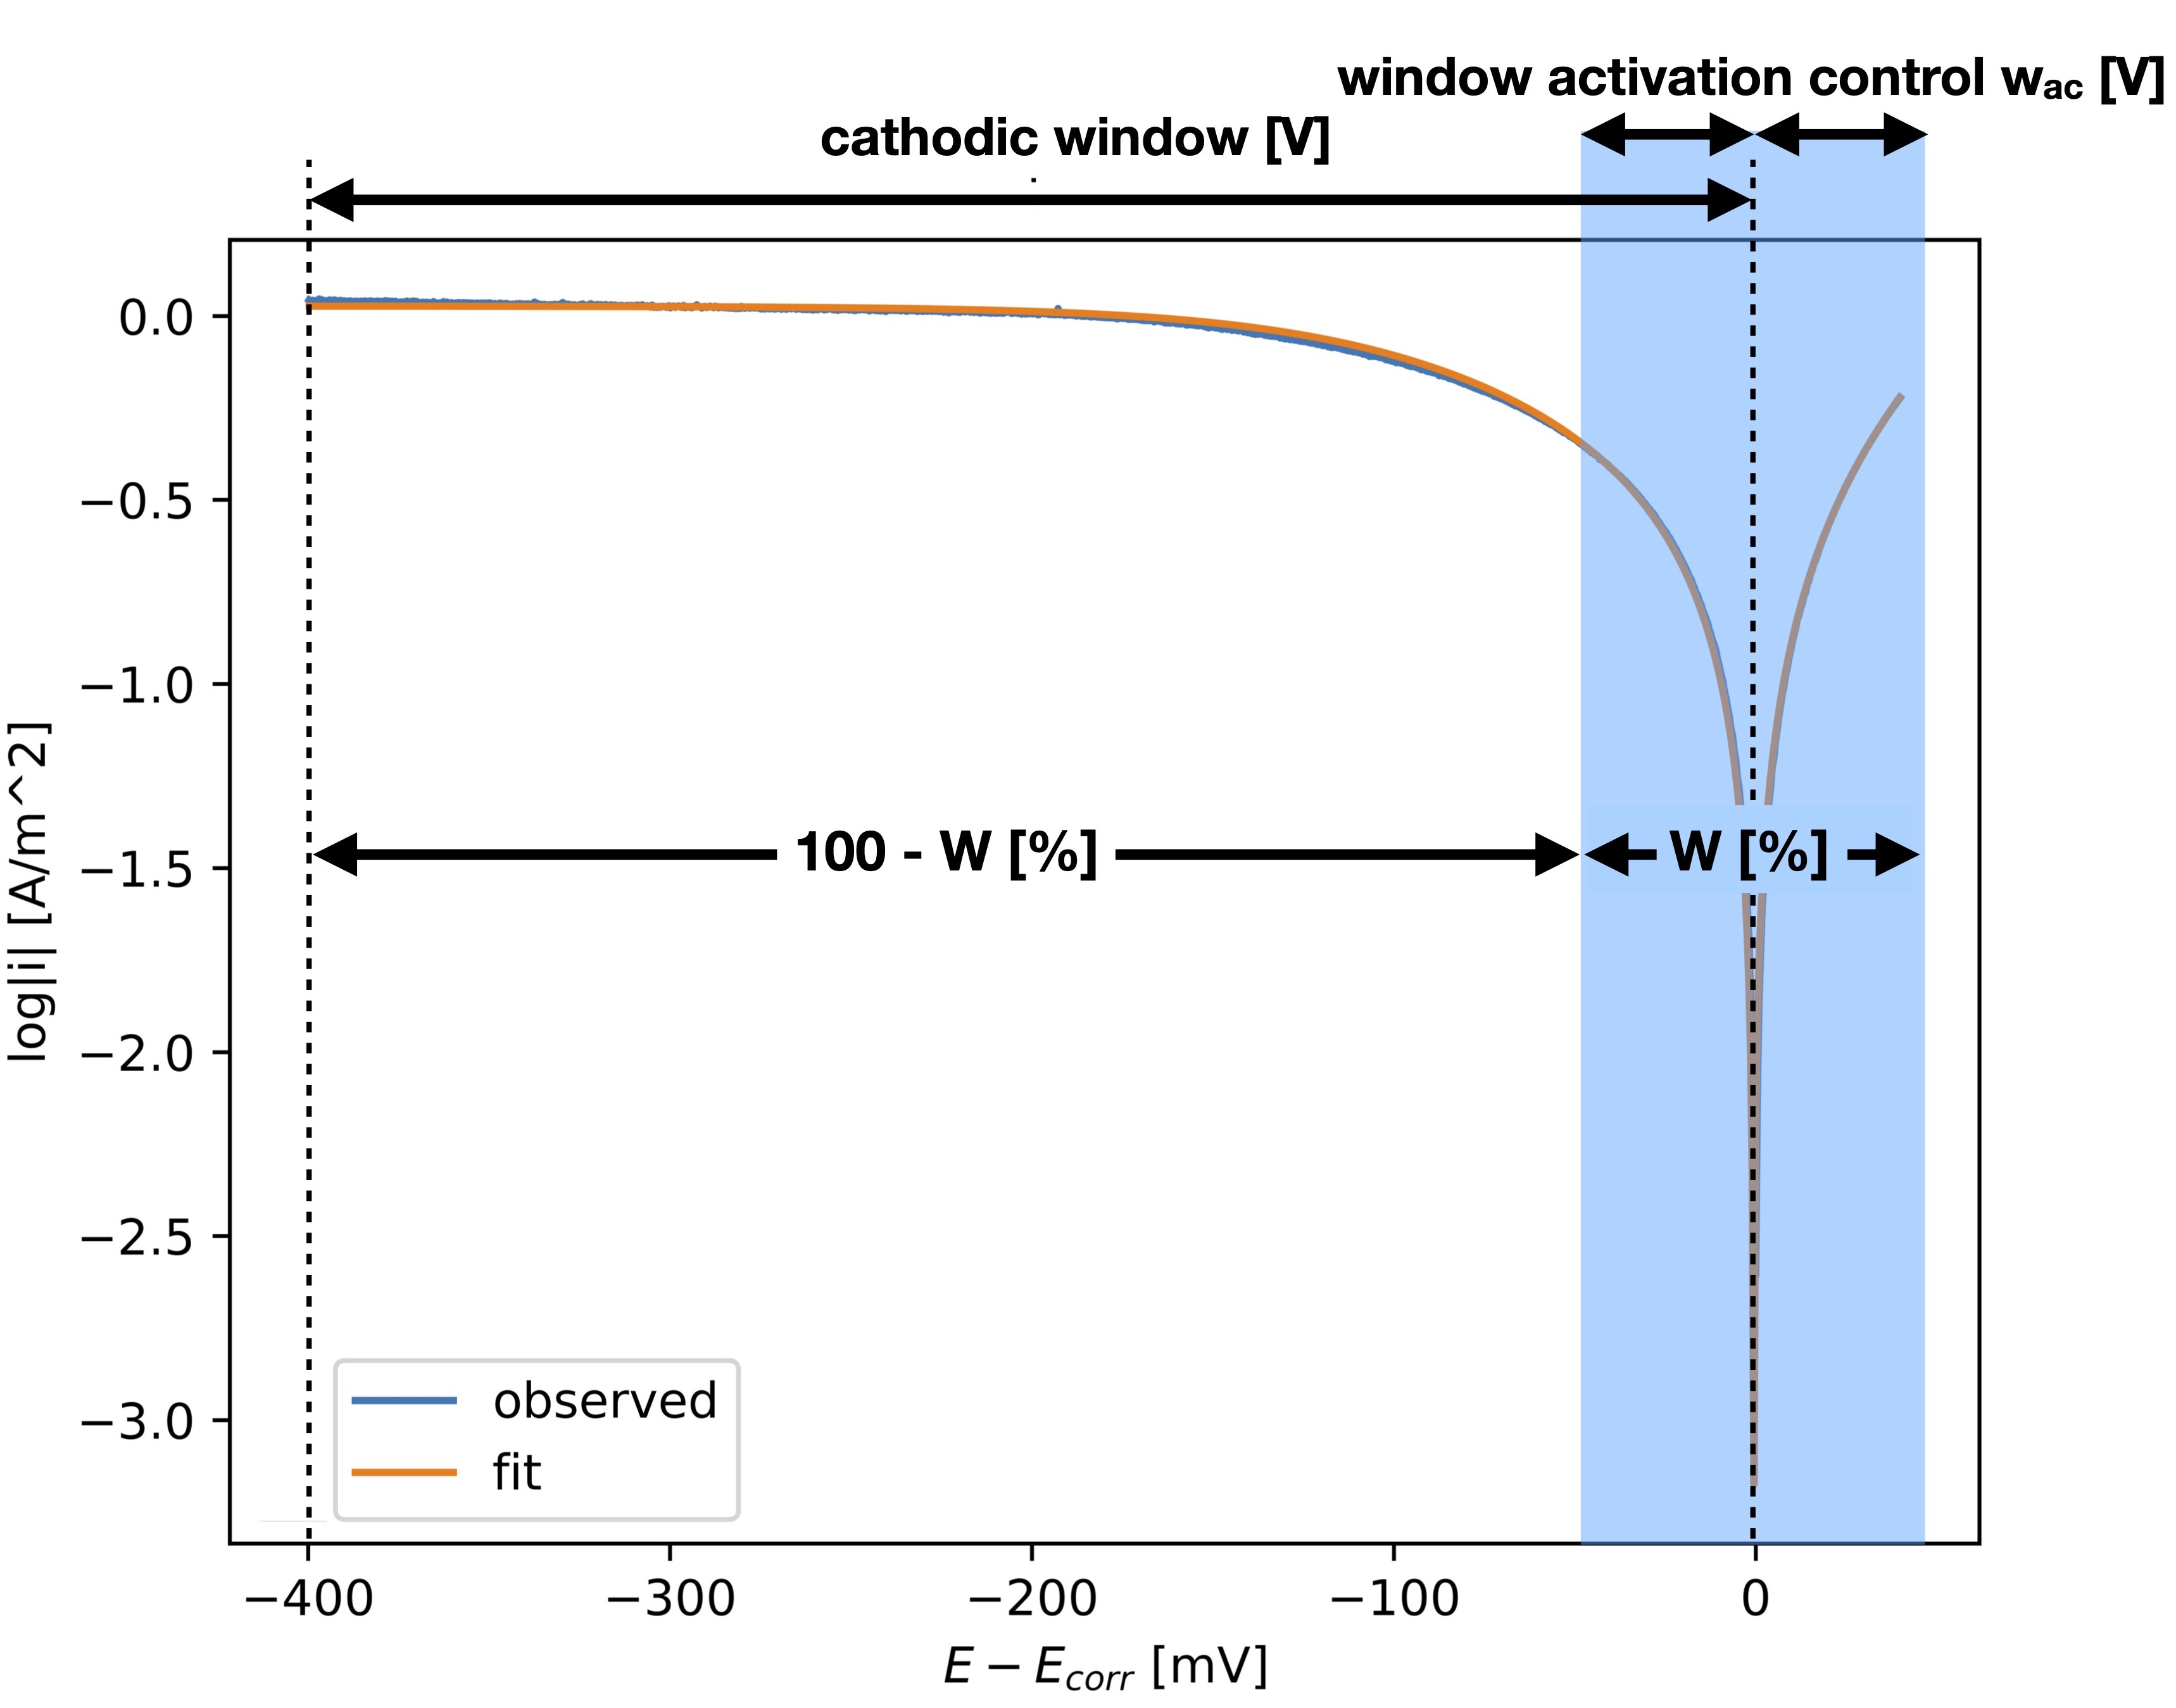
</div>

<div>
   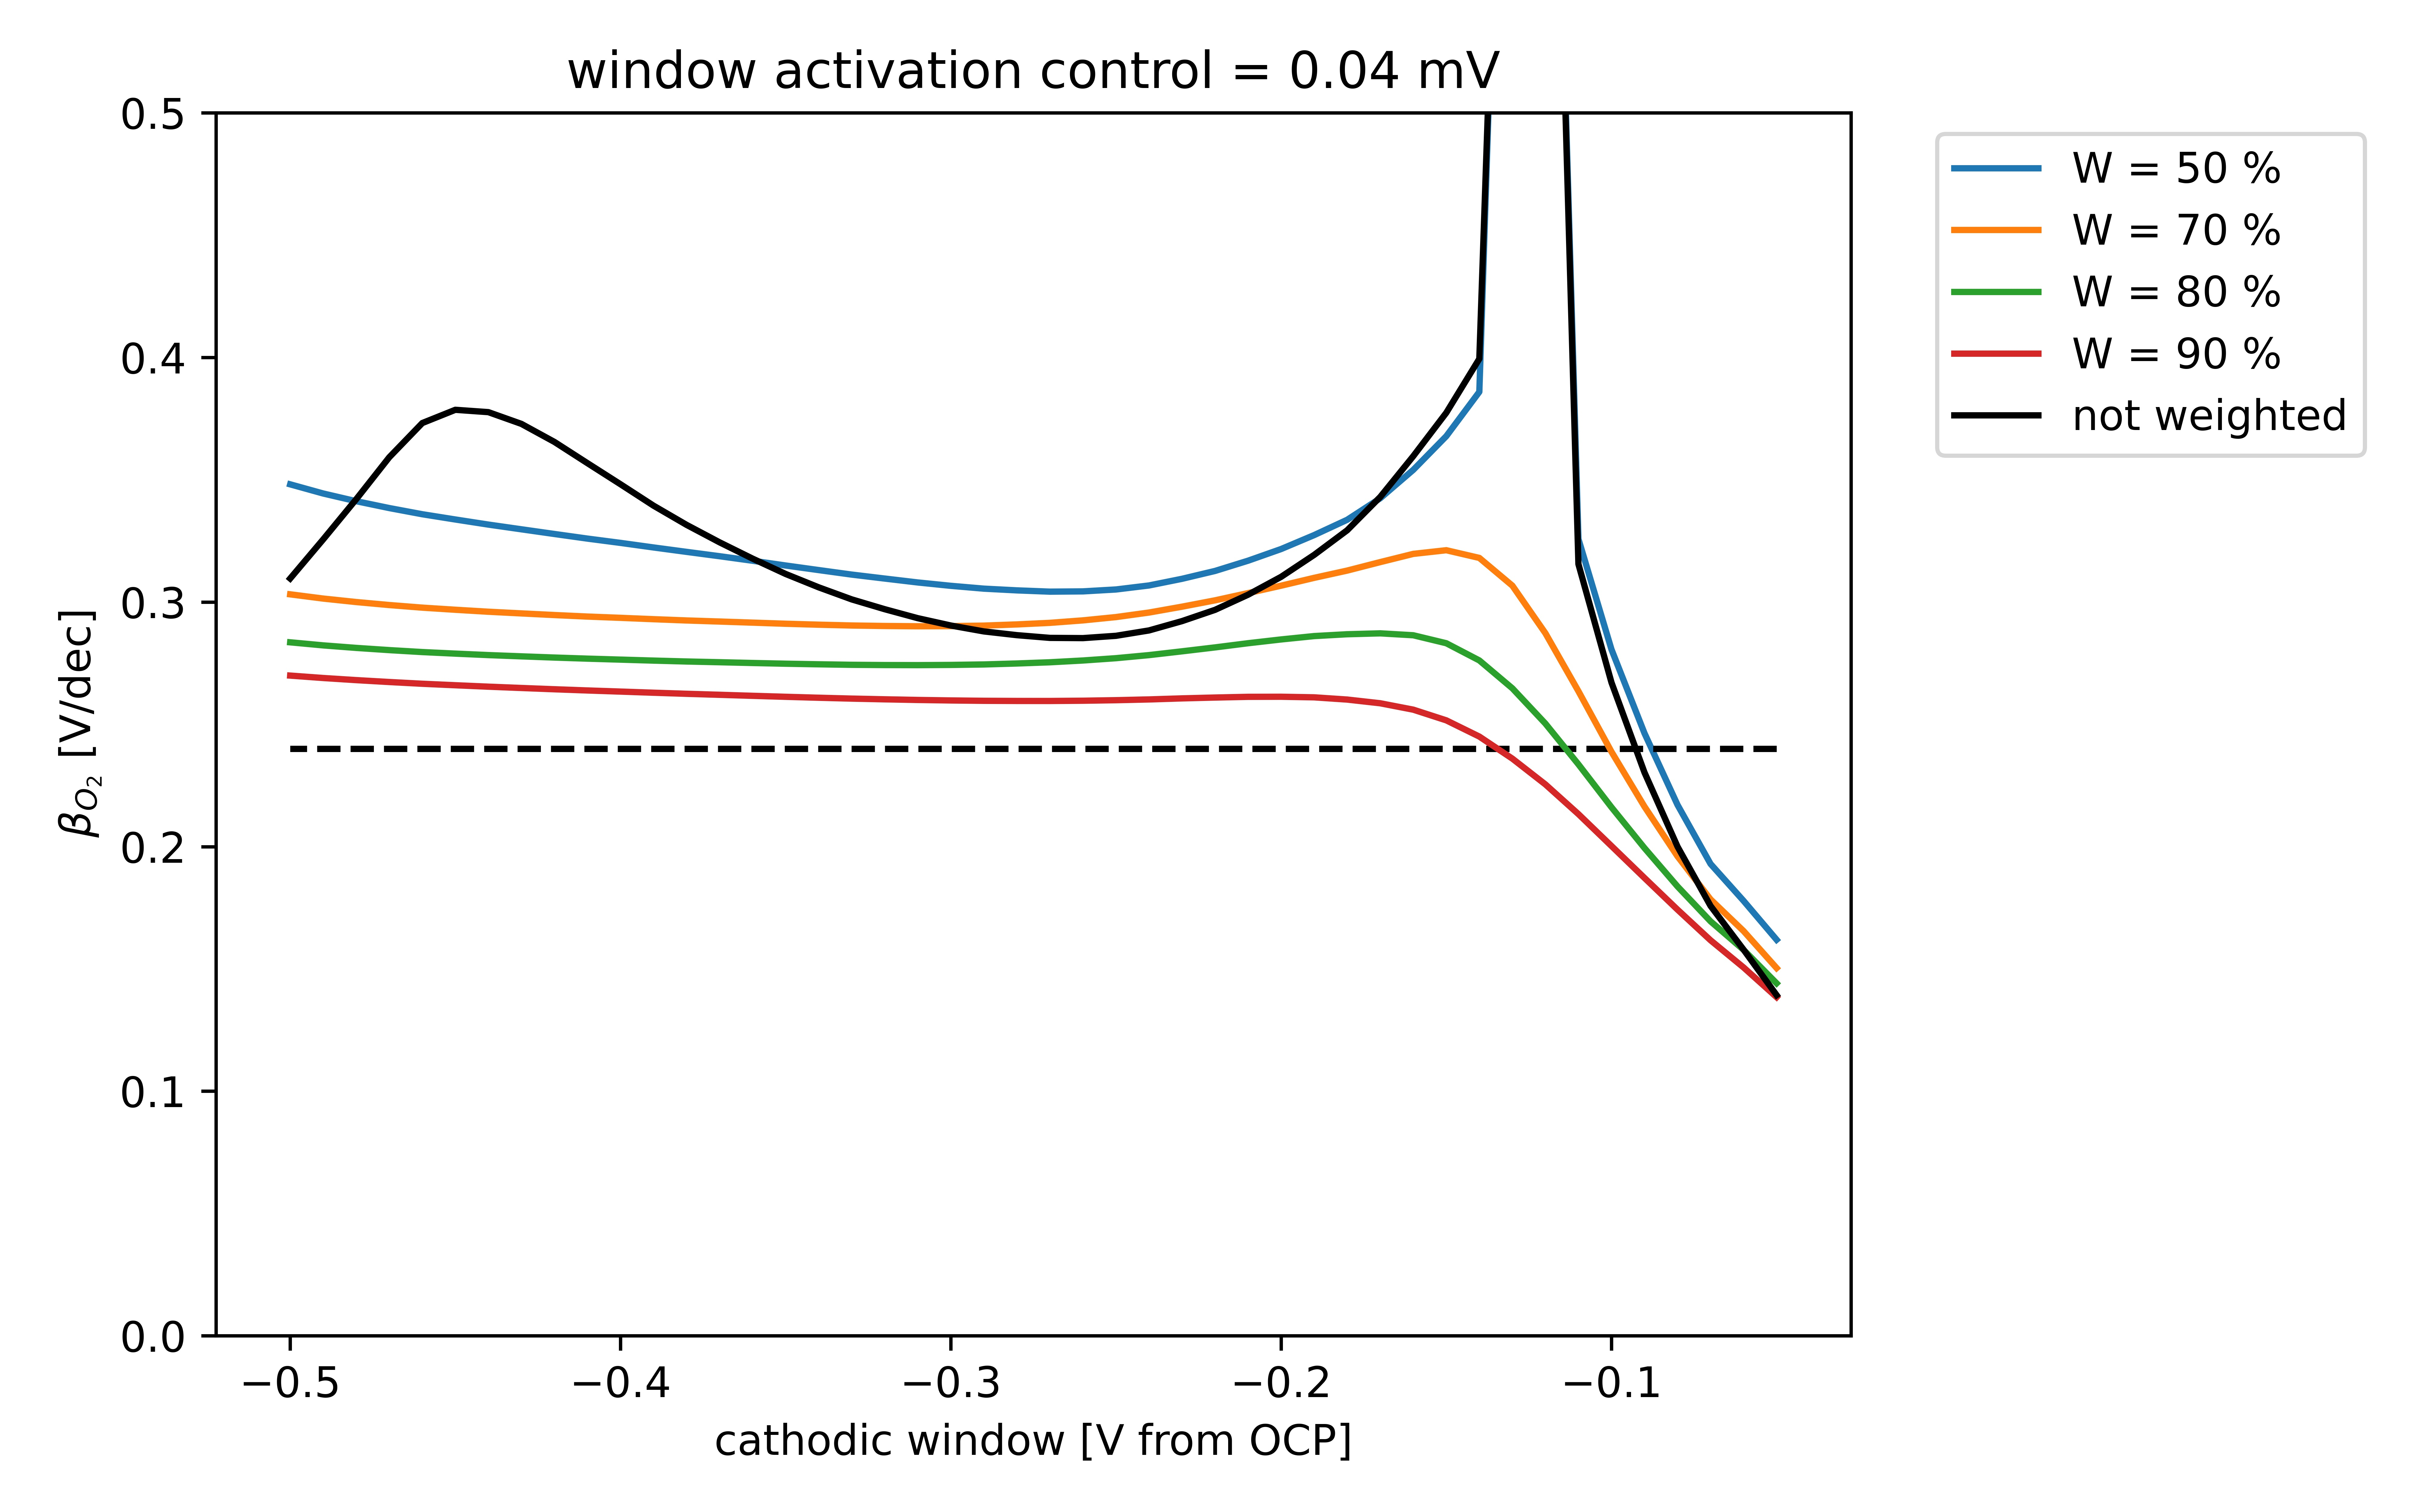
</div>

In [7]:
results = Mycurve.mixed_pol_fit(window=[-0.4,0.1], apply_weight_distribution = True, w_ac = 0.07, W = 80)

In [10]:
Mycurve.save_to_txt()

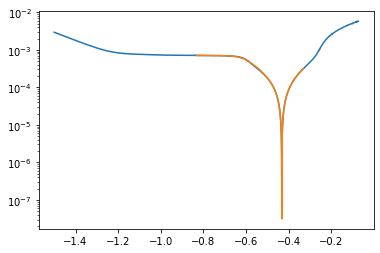

In [9]:
plt.plot(Mycurve.E, np.abs(Mycurve.i))
plt.plot(results[0][1],np.abs(results[0][0]))
plt.yscale('log')

## Sensitivity analysis

Still questioning the output. The actual output is a huge pandas dataframe.

Currently the output are figures, from which optimal settings can be determined.

Other output ideas?
- pandas data frame
- excell sheet
- text file
- seperature function to output in the desired format